In [2]:
from pathlib import Path
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import shutil
import pandas as pd
from tqdm import tqdm
import time

notebooks_path = Path.cwd()
repo_path = notebooks_path.parent
print(f'current directory is: {notebooks_path}')

import utils_ric as utils
from info import patient

current directory is: /home/ricardino/Documents/MAIA/tercer_semestre/MIRA/final_project/MIRA_FINAL_PROJECT/notebooks


# MAIN

In [46]:
def image_histogram_equalization(image, mask):
    # from http://www.janeriksolem.net/histogram-equalization-with-python-and.html

    # get image histogram
    number_bins = np.unique(image).shape[0]*2
    #use mask to extract only the lung region
    image_ext = np.extract(mask, image)
    image_histogram, bins = np.histogram(image_ext.flatten(), number_bins, density=True)
    print(len(bins))
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = (number_bins-1) * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape), cdf

In [47]:
i  =1
type_name = 'e'

pat  = patient(num = i)
im = pat.im_array(type_name)

path_mask  = str(repo_path / f'data/masks/pat{pat.pat_num}_{type_name}_lungmask.nrrd')
mask_array = sitk.GetArrayFromImage(sitk.ReadImage(path_mask))

im_masked = im * mask_array

filename = str(repo_path / f'data/nifti_masked/copd{pat.pat_num}_{type_name}BHCT.nii.gz')

im_eq, _ = image_histogram_equalization(im_masked, mask_array)

utils.save_as_nifti(im_eq, filename, reference_image = str(repo_path / pat.im_path(type_name)))

2887


2887
Min and max values of the image: 1.5487380802977924, 2885.0


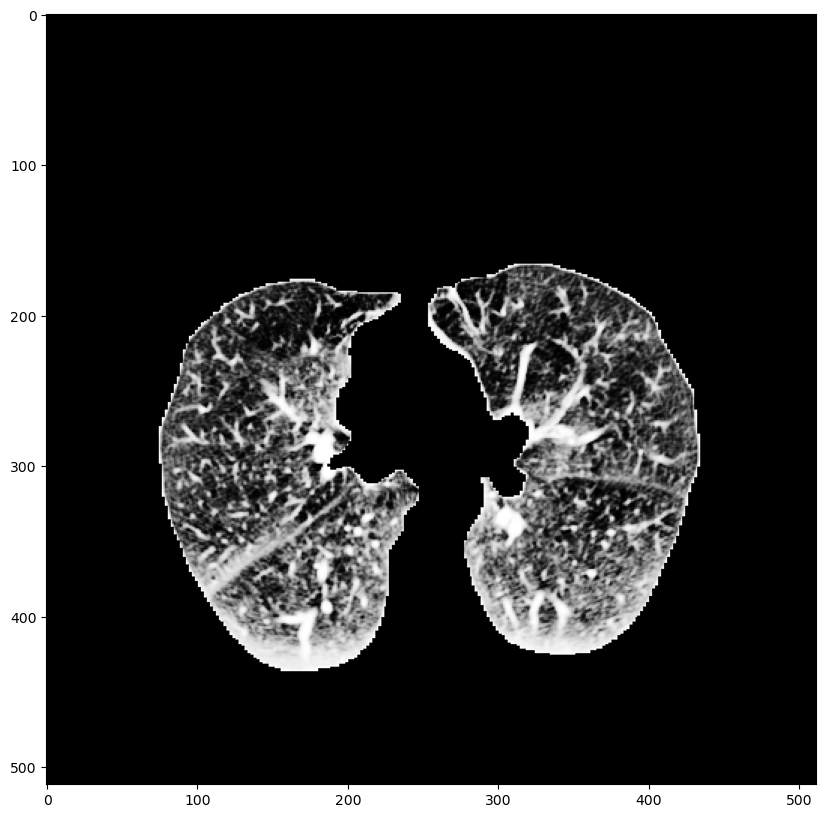

In [48]:
im_eq, _ = image_histogram_equalization(im_masked, mask_array)
plt.figure(figsize=(10,10))
plt.imshow(im_eq[52], cmap='gray')
print(f'Min and max values of the image: {np.min(im_eq)}, {np.max(im_eq)}')

(array([3891., 3190., 3373., ..., 2815., 3121., 4509.]),
 array([1.54873808e+00, 3.54697180e+00, 5.54520553e+00, ...,
        2.88100353e+03, 2.88300177e+03, 2.88500000e+03]),
 <BarContainer object of 1443 artists>)

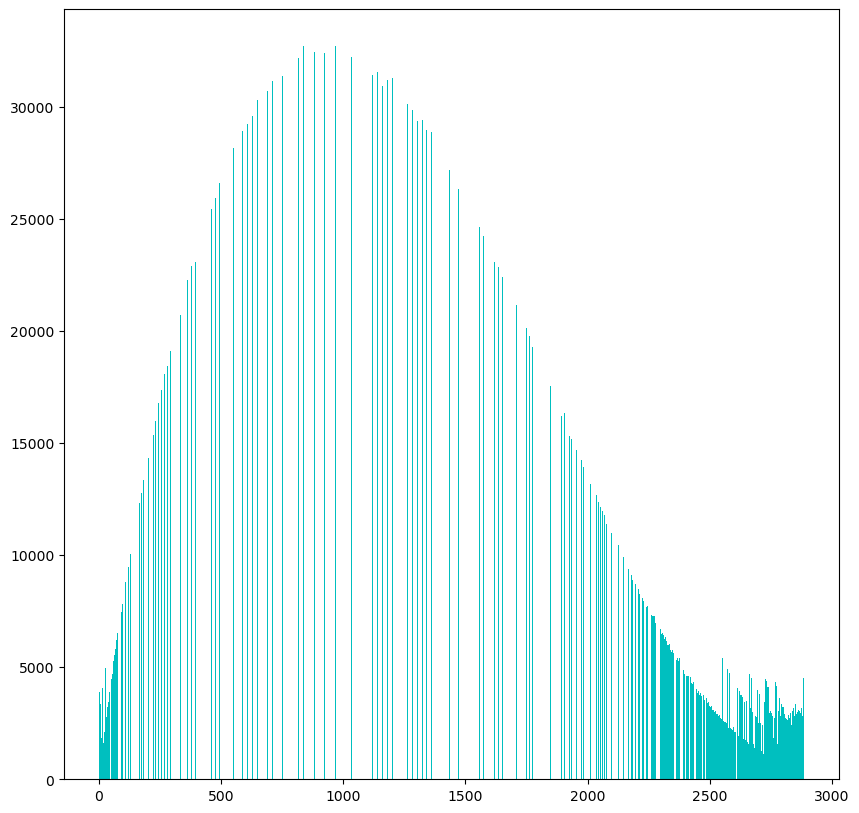

In [49]:
#show histogram of the image im_eq
plt.figure(figsize=(10,10))
plt.hist(np.extract(mask_array, im_eq), bins=np.unique(im_masked).shape[0], color='c')